In [31]:
import os
from pathlib import Path
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt

In [32]:
plt.style.use('seaborn')

In [33]:
%matplotlib inline

In [34]:
cwd =os.getcwd()
p_cwd = Path(cwd).parent.absolute()
df_stations = pd.read_csv(os.path.join(p_cwd,"data","de_phen_stations.csv"))
df_barley = pd.read_csv(os.path.join(p_cwd,"data","barley_data", "barley_obs.csv"))

In [35]:
df_stations.head()

s_id       lon      lat                                   name
0     1   9.43333  54.7667  Flensburg, kreisfreie Stadt Flensburg
1     2  10.15000  54.4000                             Kiel-Pries
2     3  10.15000  54.3333                      Kiel-Düsternbrook
3     4  10.05000  54.3167                         Kiel-Mettenhof
4     5  10.68330  53.8833                        Lübeck-Schlutup

In [53]:
a = len(df_stations['s_id'].tolist())
a

6773

In [37]:
df_barley.head()

s_id    lon      lat  alt  alt_dem   gss_id          species  phase_id  \
0  3147   8.85  49.2000  250      223  1660100  Hordeum vulgare         0   
1  4329   9.80  50.0667  240      255  1660100  Hordeum vulgare         0   
2  3147   8.85  49.2000  250      223  1660100  Hordeum vulgare        10   
3  3090   8.70  49.2500  140      188  1660100  Hordeum vulgare         0   
4  3845  12.00  49.5500  400      398  1660100  Hordeum vulgare         0   

   year  month  day  day_year  cult_season  
0  1951      2   13        44            1  
1  1951      2   26        57            1  
2  1951      3    1        60            1  
3  1951      3    2        61            1  
4  1951      3    2        61            1

In [54]:
b = len(df_barley['s_id'].unique().tolist())
b

6043

In [39]:
(1-b/a)*100 #loss of stations

10.778089472907126

In [40]:
df_barley.drop(['lon','lat'], axis=1, inplace=True)

In [41]:
df = df_barley.merge(df_stations, on='s_id', how='inner')

In [42]:
df

s_id  alt  alt_dem   gss_id          species  phase_id  year  month  \
0       3147  250      223  1660100  Hordeum vulgare         0  1951      2   
1       3147  250      223  1660100  Hordeum vulgare        10  1951      3   
2       3147  250      223  1660100  Hordeum vulgare        51  1951      6   
3       3147  250      223  1660100  Hordeum vulgare         0  1952      3   
4       3147  250      223  1660100  Hordeum vulgare        10  1952      3   
...      ...  ...      ...      ...              ...       ...   ...    ...   
716805  1483  400      436  1660100  Hordeum vulgare        51  1963      7   
716806  1726   80       78  1660100  Hordeum vulgare         0  1962     10   
716807  1726   80       78  1660100  Hordeum vulgare        10  1962     10   
716808  3046  120      150  1660100  Hordeum vulgare        51  1963      5   
716809   935   25       28  1660100  Hordeum vulgare        51  1963      6   

        day  day_year  cult_season      lon      lat                    name  
0        13        44            1  8.85000  49.2000                Hilsbach  
1         1        60            1  8.85000  49.2000                Hilsbach  
2         1       152            1  8.85000  49.2000                Hilsbach  
3        10        70            1  8.85000  49.2000                Hilsbach  
4        31        91            1  8.85000  49.2000                Hilsbach  
...     ...       ...          ...      ...      ...                     ...  
716805    1       182            1  6.46667  50.5000              Blumenthal  
716806    6       279            2  8.48333  51.8000             Westerwiehe  
716807   11       284            2  8.48333  51.8000             Westerwiehe  
716808   20       140            1  8.48333  49.0000  Karlsruhe-Durlach (Ph)  
716809   18       169            2  7.16667  52.4667              Klausheide  

[716810 rows x 14 columns]

In [43]:
gdf = gpd.GeoDataFrame(
     df, geometry=gpd.points_from_xy(df.lon, df.lat))

In [44]:
gdf.crs = "WGS84"

In [45]:
gdf

s_id  alt  alt_dem   gss_id          species  phase_id  year  month  \
0       3147  250      223  1660100  Hordeum vulgare         0  1951      2   
1       3147  250      223  1660100  Hordeum vulgare        10  1951      3   
2       3147  250      223  1660100  Hordeum vulgare        51  1951      6   
3       3147  250      223  1660100  Hordeum vulgare         0  1952      3   
4       3147  250      223  1660100  Hordeum vulgare        10  1952      3   
...      ...  ...      ...      ...              ...       ...   ...    ...   
716805  1483  400      436  1660100  Hordeum vulgare        51  1963      7   
716806  1726   80       78  1660100  Hordeum vulgare         0  1962     10   
716807  1726   80       78  1660100  Hordeum vulgare        10  1962     10   
716808  3046  120      150  1660100  Hordeum vulgare        51  1963      5   
716809   935   25       28  1660100  Hordeum vulgare        51  1963      6   

        day  day_year  cult_season      lon      lat                    name  \
0        13        44            1  8.85000  49.2000                Hilsbach   
1         1        60            1  8.85000  49.2000                Hilsbach   
2         1       152            1  8.85000  49.2000                Hilsbach   
3        10        70            1  8.85000  49.2000                Hilsbach   
4        31        91            1  8.85000  49.2000                Hilsbach   
...     ...       ...          ...      ...      ...                     ...   
716805    1       182            1  6.46667  50.5000              Blumenthal   
716806    6       279            2  8.48333  51.8000             Westerwiehe   
716807   11       284            2  8.48333  51.8000             Westerwiehe   
716808   20       140            1  8.48333  49.0000  Karlsruhe-Durlach (Ph)   
716809   18       169            2  7.16667  52.4667              Klausheide   

                        geometry  
0       POINT (8.85000 49.20000)  
1       POINT (8.85000 49.20000)  
2       POINT (8.85000 49.20000)  
3       POINT (8.85000 49.20000)  
4       POINT (8.85000 49.20000)  
...                          ...  
716805  POINT (6.46667 50.50000)  
716806  POINT (8.48333 51.80000)  
716807  POINT (8.48333 51.80000)  
716808  POINT (8.48333 49.00000)  
716809  POINT (7.16667 52.46670)  

[716810 rows x 15 columns]

In [46]:
len(gdf['s_id'].unique().tolist())

6043

In [47]:
gdf_trans = gdf.to_crs(epsg=3857)

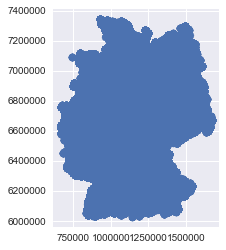

In [48]:
gdf_trans.plot()

In [49]:
gdf_trans

s_id  alt  alt_dem   gss_id          species  phase_id  year  month  \
0       3147  250      223  1660100  Hordeum vulgare         0  1951      2   
1       3147  250      223  1660100  Hordeum vulgare        10  1951      3   
2       3147  250      223  1660100  Hordeum vulgare        51  1951      6   
3       3147  250      223  1660100  Hordeum vulgare         0  1952      3   
4       3147  250      223  1660100  Hordeum vulgare        10  1952      3   
...      ...  ...      ...      ...              ...       ...   ...    ...   
716805  1483  400      436  1660100  Hordeum vulgare        51  1963      7   
716806  1726   80       78  1660100  Hordeum vulgare         0  1962     10   
716807  1726   80       78  1660100  Hordeum vulgare        10  1962     10   
716808  3046  120      150  1660100  Hordeum vulgare        51  1963      5   
716809   935   25       28  1660100  Hordeum vulgare        51  1963      6   

        day  day_year  cult_season      lon      lat                    name  \
0        13        44            1  8.85000  49.2000                Hilsbach   
1         1        60            1  8.85000  49.2000                Hilsbach   
2         1       152            1  8.85000  49.2000                Hilsbach   
3        10        70            1  8.85000  49.2000                Hilsbach   
4        31        91            1  8.85000  49.2000                Hilsbach   
...     ...       ...          ...      ...      ...                     ...   
716805    1       182            1  6.46667  50.5000              Blumenthal   
716806    6       279            2  8.48333  51.8000             Westerwiehe   
716807   11       284            2  8.48333  51.8000             Westerwiehe   
716808   20       140            1  8.48333  49.0000  Karlsruhe-Durlach (Ph)   
716809   18       169            2  7.16667  52.4667              Klausheide   

                              geometry  
0       POINT (985177.494 6308865.597)  
1       POINT (985177.494 6308865.597)  
2       POINT (985177.494 6308865.597)  
3       POINT (985177.494 6308865.597)  
4       POINT (985177.494 6308865.597)  
...                                ...  
716805  POINT (719866.412 6533321.568)  
716806  POINT (944359.976 6764043.361)  
716807  POINT (944359.976 6764043.361)  
716808  POINT (944359.976 6274861.394)  
716809  POINT (797790.055 6884954.715)  

[716810 rows x 15 columns]

In [50]:
gdf_trans.describe()

s_id            alt        alt_dem     gss_id       phase_id  \
count  716810.000000  716810.000000  716810.000000   716810.0  716810.000000   
mean     2923.706833     245.477530     249.112303  1660100.0      39.098039   
std      1919.566077     182.840122     186.071600        0.0      36.699882   
min         1.000000       0.000000      -5.000000  1660100.0       0.000000   
25%      1537.000000      80.000000      73.000000  1660100.0      10.000000   
50%      2877.000000     220.000000     232.000000  1660100.0      31.000000   
75%      4094.000000     380.000000     394.000000  1660100.0      51.000000   
max     21529.000000     991.000000    1055.000000  1660100.0     100.000000   

                year          month            day       day_year  \
count  716810.000000  716810.000000  716810.000000  716810.000000   
mean     1980.069130       6.247882      16.009323     174.695562   
std        15.720465       2.125995       8.527774      64.830058   
min      1951.000000       1.000000       1.000000      18.000000   
25%      1969.000000       4.000000       9.000000     119.000000   
50%      1979.000000       6.000000      16.000000     163.000000   
75%      1989.000000       8.000000      23.000000     225.000000   
max      2019.000000      12.000000      31.000000     350.000000   

         cult_season            lon            lat  
count  716810.000000  716810.000000  716810.000000  
mean        1.559048       9.777157      50.730660  
std         0.496501       1.816481       1.741174  
min         1.000000       5.983330      47.516700  
25%         1.000000       8.500000      49.350000  
50%         2.000000       9.650000      50.550000  
75%         2.000000      11.016700      52.016700  
max         2.000000      15.033300      54.900000

In [51]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  # Remove the CWD from sys.path while we load stuff.


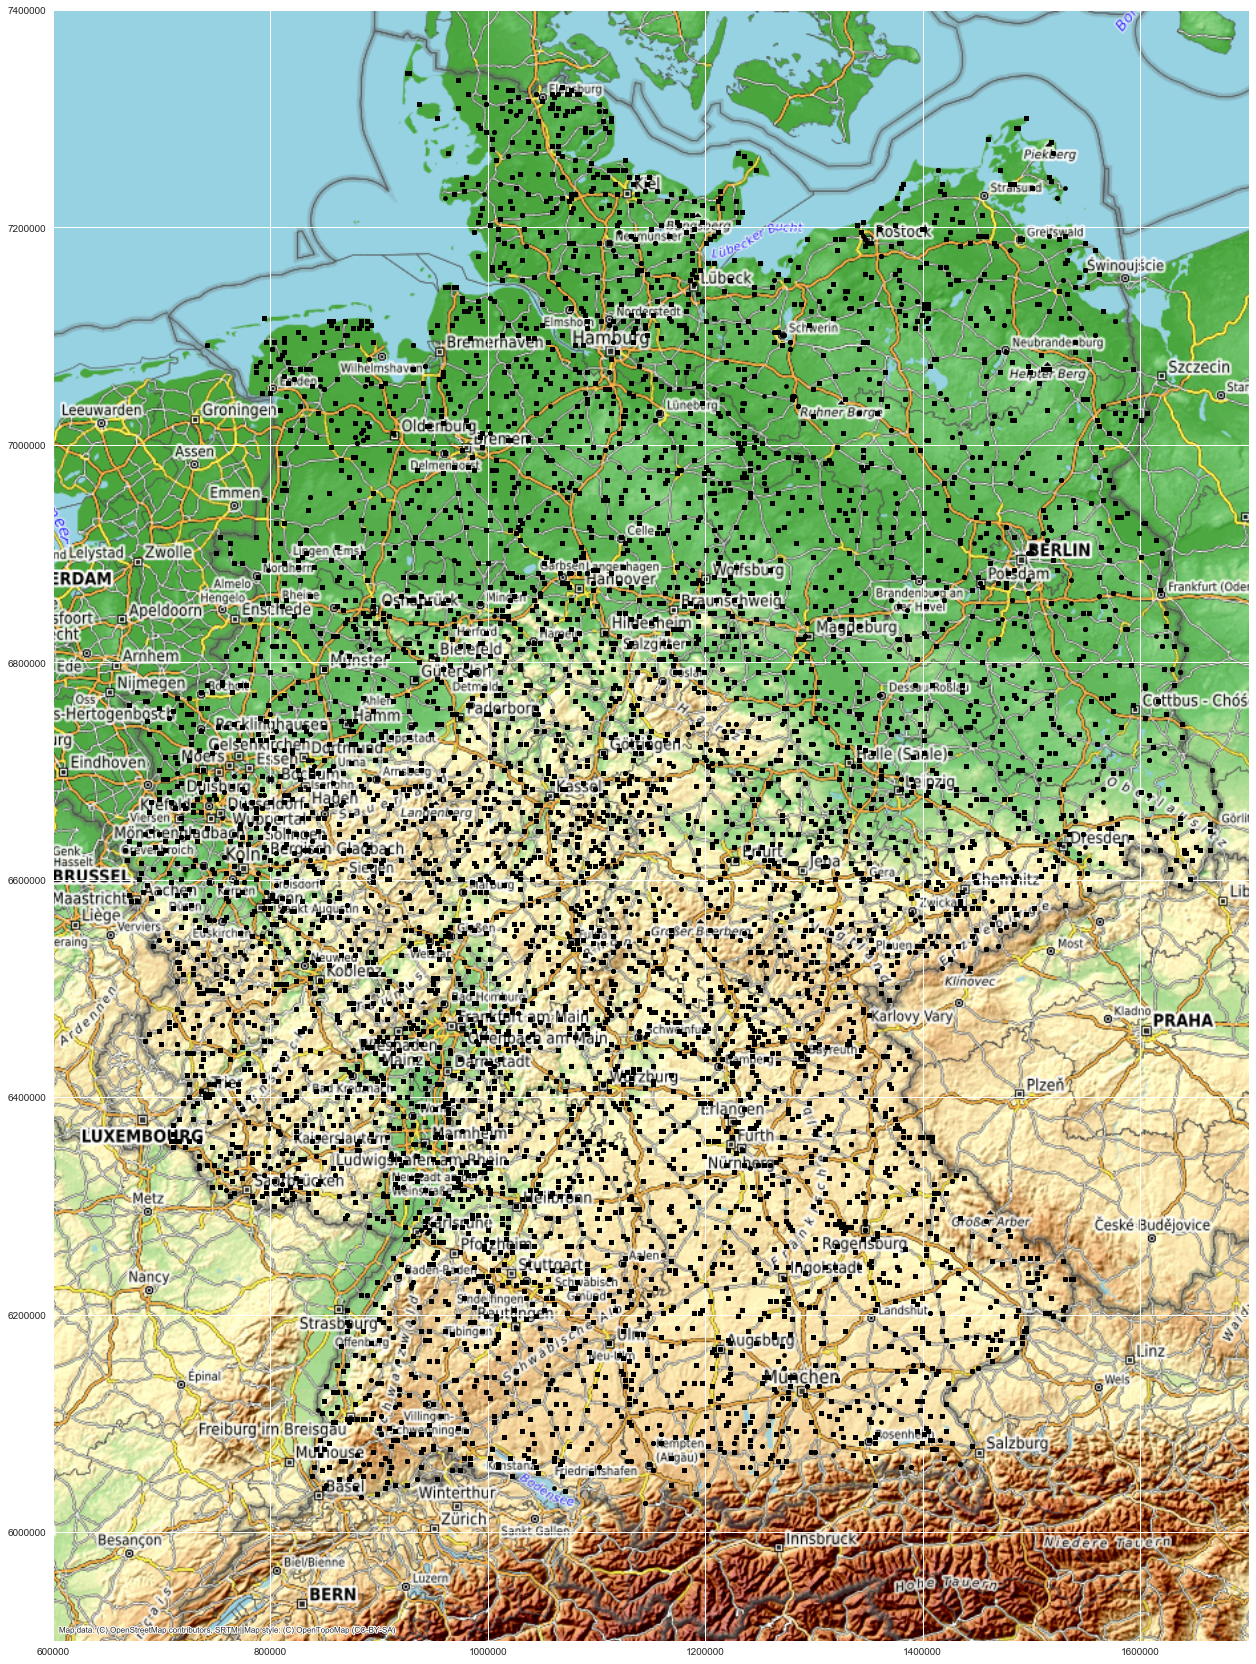

In [52]:
fig, ax = plt.subplots(figsize=(30, 30))
extent = (600000, 1700000, 5900000, 7400000)
gdf_trans.plot(ax=ax, color='black', markersize=20.0)
ax.axis(extent)
ctx.add_basemap(ax, source=ctx.providers.OpenTopoMap)

plt.savefig(os.path.join(p_cwd, "output", "images", "map_barley_phen_stat_de.jpg"), dpi=300, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format='jpg',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
